https://capitalbikeshare.com/system-data

# IMPORTS

In [36]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# lecture du jeu de donnees

In [37]:
data = pd.read_csv('Capital_Bikeshare_dataDV.csv', sep=';')

# Affichage du jeu de donnees

In [38]:
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      804 non-null    object 
 1   season      804 non-null    int64  
 2   yr          804 non-null    int64  
 3   mnth        804 non-null    int64  
 4   holiday     804 non-null    int64  
 5   weekday     804 non-null    int64  
 6   workingday  804 non-null    int64  
 7   weathersit  804 non-null    int64  
 8   temp        788 non-null    float64
 9   atemp       804 non-null    float64
 10  hum         802 non-null    float64
 11  windspeed   796 non-null    float64
 12  casual      804 non-null    int64  
 13  registered  804 non-null    int64  
 14  cnt         804 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 94.3+ KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,788.000000,804.000000,802.000000,796.000000,804.000000,804.000000,804.000000
mean,2.488806,0.500000,6.522388,0.027363,3.021144,0.682836,1.389303,0.491770,0.471459,0.622822,0.191118,842.633085,3644.486318,4487.119403
std,1.120898,0.500311,3.478917,0.163241,2.009517,0.465662,0.548004,0.184423,0.163911,0.144308,0.077183,683.810619,1577.836614,1955.199816
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.329792,0.330006,0.518383,0.135571,314.750000,2467.000000,3116.500000
50%,2.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.485417,0.474744,0.621250,0.180975,697.000000,3638.500000,4508.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.653541,0.607962,0.726042,0.233376,1094.250000,4841.000000,5978.500000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Verification de présence de valeurs manquantes

In [39]:
data.isnull().sum()

dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          16
atemp          0
hum            2
windspeed      8
casual         0
registered     0
cnt            0
dtype: int64

In [40]:
missing_percentage = data.isnull().sum() / data.shape[0] * 100
missing_percentage

dteday        0.000000
season        0.000000
yr            0.000000
mnth          0.000000
holiday       0.000000
weekday       0.000000
workingday    0.000000
weathersit    0.000000
temp          1.990050
atemp         0.000000
hum           0.248756
windspeed     0.995025
casual        0.000000
registered    0.000000
cnt           0.000000
dtype: float64

On contate qu'on a des valeurs manquantes

## Verification de presence de doublons

In [41]:
duplicates = data.duplicated()

# Vérifier si des doublons existent
if duplicates.any():
    print("Des doublons existent dans le jeu de données.")
else:
    print("Aucun doublon trouvé dans le jeu de données.")

Des doublons existent dans le jeu de données.


In [42]:
# Calculer le pourcentage de doublons
duplicate_percentage = (data.duplicated().sum() / len(data)) * 100
duplicate_percentage

8.83084577114428

## Verification des erreurs de formats

In [43]:
# Vérifier les erreurs de format pour les dates
try:
    data['dteday'] = pd.to_datetime(data['dteday'], format='%d/%m/%Y')
    print("Aucune erreur de format détectée pour les dates.")
except ValueError:
    print("Des erreurs de format sont présentes dans les dates.")

# Vérifier les erreurs de format pour les nombres
try:
    data['windspeed'] = pd.to_numeric(data['windspeed'])
    data['temp'] = pd.to_numeric(data['temp'])
    data['atemp'] = pd.to_numeric(data['atemp'])
    data['hum'] = pd.to_numeric(data['hum'])
    print("Aucune erreur de format détectée pour les nombres.")
except ValueError:
    print("Des erreurs de format sont présentes dans les nombres.")

Aucune erreur de format détectée pour les dates.
Aucune erreur de format détectée pour les nombres.


<Axes: xlabel='dteday', ylabel='temp'>

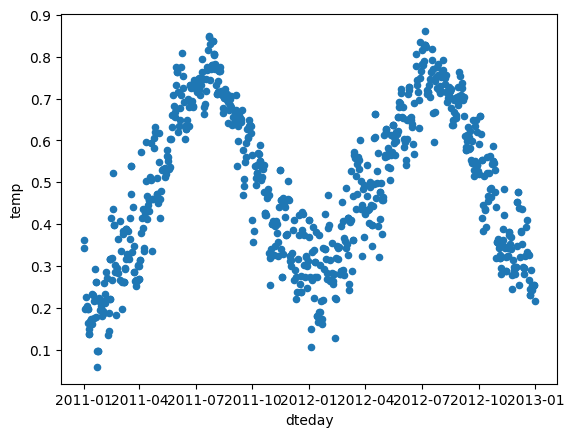

In [44]:
data.plot(x='dteday', y='temp', kind='scatter')

data.